# Зависимость координаты от времени

b' omega = 1 beta = 0.1  x = 1  v = 1 dt = 0.1\r\nQuality factor calculated by Euler method = nan\r\nQuality factor calculated by Heun method = nan\r\n' 0
500


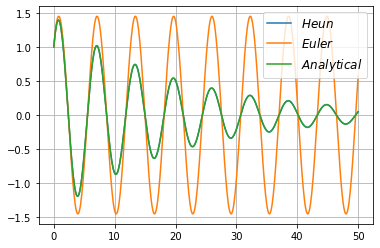

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess


omega = 1.0
beta = 0.1
initial_x = 1.0
dt = 0.1
initial_v = 1.0
time = 50.0

p = subprocess.Popen([r'C:\Users\User\Desktop\3_term\3rd-semester-MIPT\Informatics\viscous_friction\cmake-build-debug\viscous_friction',
                 str(omega), str(beta), str(initial_x), str(initial_v), str(dt), str(time)], stdout=subprocess.PIPE, shell=True,
                        stdin=subprocess.PIPE,
                        stderr=subprocess.PIPE)
streamdata = p.communicate()[0]
rc = p.returncode

print(streamdata, rc)

with open('x_euler.bin', 'rb') as file:
    x_euler = np.fromfile(file, dtype=float, count=-1)

with open('v_euler.bin', 'rb') as file:
    v_euler = np.fromfile(file, dtype=float, count=-1)
    
with open('x_heun.bin', 'rb') as file:
    x_heun = np.fromfile(file, dtype=float, count=-1)

with open('v_heun.bin', 'rb') as file:
    v_heun = np.fromfile(file, dtype=float, count=-1)

t = np.linspace(0.0, time, np.size(x_euler));

print(np.size(x_euler))
plt.plot(t, x_heun, label=r'$Heun$')
plt.plot(t, x_euler, label=r'$Euler$')
x = np.empty(np.size(x_euler), float)
v = np.empty(np.size(x_euler), float)
Z = (initial_x**2 + ((initial_v + initial_x * beta / 2)/(omega**2 - (beta**2)/4))**2)**0.5
phi_0 = - np.arctan(initial_v/(initial_x * (omega**2 - (beta**2)/4)** 0.5) + beta / (2 * (omega**2 - (beta**2)/4)** 0.5))
for i in range(np.size(x_euler)):
    x[i] = Z * np.exp(-0.5*beta * t[i]) * np.cos(t[i] * np.sqrt(omega*omega - beta*beta/4) + phi_0) 

for i in range(np.size(x_euler)):
    v[i] = - Z * np.exp(-0.5*beta * t[i]) * (beta * 0.5 * np.cos(t[i] * np.sqrt(omega*omega - beta*beta/4) + phi_0) + np.sqrt(omega*omega - beta*beta/4) * np.sin(np.sqrt(omega*omega - beta*beta/4) * t[i] + phi_0)) 
plt.plot(t, x, label=r'$Analytical$')
plt.legend(loc='best', fontsize=12)
plt.grid(True)

# Зависимость скорости от времени

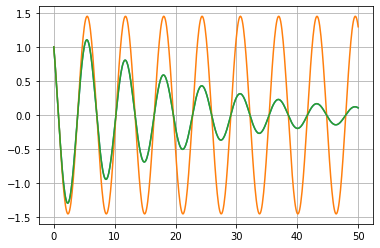

In [28]:
plt.plot(t, v_heun, label=r'$Heun$')
plt.plot(t, v_euler, label=r'$Euler$')
plt.plot(t, v, label=r'$Analytical$')
plt.grid(True)

# Фазовая диаграмма

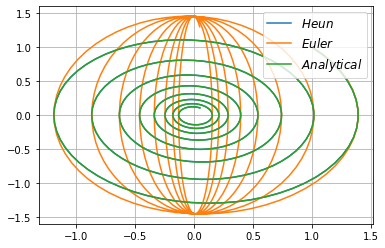

In [29]:
plt.plot(x_heun, v_heun, label=r'$Heun$')
plt.plot(x_heun, v_euler, label=r'$Euler$')
plt.plot(x, v, label=r'$Analytical$')
plt.legend(loc='best', fontsize=12)
plt.grid(True)